Exercises and code samples for the course Unsupervised and Reinforcement Learning (AAI-URL) in the Bachelor of AAI at Rosenheim University of Applied Sciences

# Hierarchical Clustering and Dendrograms


### Distances and hierarchical clustering

We start with a small datatset bottom up and try to cluster the points:

In [3]:
import numpy as np

# Given data:
a=np.array([[1,7], [-5,9], [-9,4], [4,-2]])

np.linalg.norm(a[:, None, :] - a[None, :, :], axis=-1)

array([[ 0.        ,  6.32455532, 10.44030651,  9.48683298],
       [ 6.32455532,  0.        ,  6.40312424, 14.2126704 ],
       [10.44030651,  6.40312424,  0.        , 14.31782106],
       [ 9.48683298, 14.2126704 , 14.31782106,  0.        ]])

Group closest pairs together: [1,7] and [-5,9], [-9,4], [4,-2]

Calculate mean point to find centeroid:

In [4]:
np.mean([[1,7],[-5,9]], axis=0)

array([-2.,  8.])

Add the new centeroid to the list and recalc:

In [5]:
a=np.array([[-2,8], [-9,4], [4,-2]])
np.linalg.norm(a[:, None, :] - a[None, :, :], axis=-1)

array([[ 0.        ,  8.06225775, 11.66190379],
       [ 8.06225775,  0.        , 14.31782106],
       [11.66190379, 14.31782106,  0.        ]])

Use a **Dendrogram** to visualize the process:

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5]],
 'dcoord': [[0.0, 6.324555320336759, 6.324555320336759, 0.0],
  [0.0, 8.06225774829855, 8.06225774829855, 6.324555320336759],
  [0.0, 12.023125864580956, 12.023125864580956, 8.06225774829855]],
 'ivl': ['3', '2', '0', '1'],
 'leaves': [3, 2, 0, 1],
 'color_list': ['C1', 'C1', 'C0'],
 'leaves_color_list': ['C0', 'C1', 'C1', 'C1']}

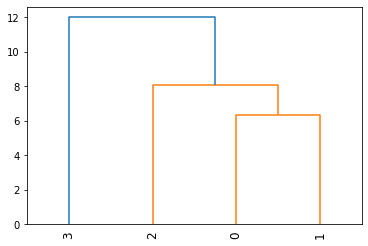

In [7]:
from scipy.cluster.hierarchy import linkage, dendrogram

result=np.array([[1,7],[-5,9],[-9,4],[4,-2]])

distances = linkage(result, method="centroid", metric="euclidean")
dendrogram(distances, truncate_mode='lastp', show_contracted=True,leaf_rotation=90.)


### A bit more data

USe dendrogram to determine the cluster number k.


In [8]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline

# Generate a random cluster dataset to experiment on. X = coordinate points, y = cluster labels (not needed)
X, y = make_blobs(n_samples=1000, centers=8, n_features=2, random_state=800)

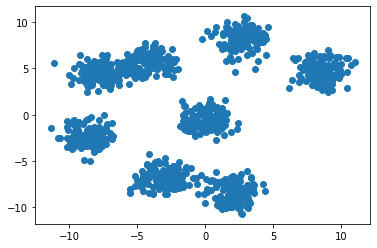

In [9]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [10]:
# Generate distance matrix with 'linkage' function
distances = linkage(X, method="centroid", metric="euclidean")
print(distances)

[[5.72000000e+02 7.62000000e+02 7.69412624e-03 2.00000000e+00]
 [3.00000000e+01 1.96000000e+02 8.87881891e-03 2.00000000e+00]
 [5.91000000e+02 8.70000000e+02 1.07476240e-02 2.00000000e+00]
 ...
 [1.98900000e+03 1.99200000e+03 7.81168528e+00 3.75000000e+02]
 [1.99500000e+03 1.99600000e+03 1.02408477e+01 7.50000000e+02]
 [1.99400000e+03 1.99700000e+03 1.20025814e+01 1.00000000e+03]]


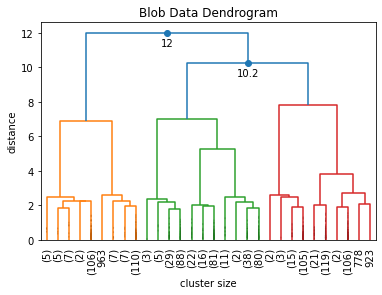

In [11]:
# Take normal dendrogram output and stylize in cleaner way

def annotated_dendrogram(*args, **kwargs):
    # Standard dendrogram from SciPy
    scipy_dendro = dendrogram(*args, truncate_mode='lastp', show_contracted=True,leaf_rotation=90.)

    plt.title('Blob Data Dendrogram')
    plt.xlabel('cluster size')
    plt.ylabel('distance')
    
    for i, d, c in zip(scipy_dendro['icoord'], scipy_dendro['dcoord'], scipy_dendro['color_list']):
        x = 0.5 * sum(i[1:3])
        y = d[1]
        if y > 10:
            plt.plot(x, y, 'o', c=c)
            plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                         textcoords='offset points',
                         va='top', ha='center')
    return scipy_dendro

dn = annotated_dendrogram(distances)
plt.show()

>This results in a cluster number k=7, since there are three lines with highest distance without intersection!

Use fcluster to visualize:

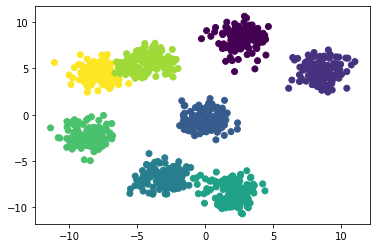

In [12]:
scipy_clusters = fcluster(distances, 3, criterion="distance")
plt.scatter(X[:,0], X[:,1], c=scipy_clusters)
plt.show()

### AgglomerativeClustering

Finally, let's use AgglomerativeClustering for bottom-up clustering with k=7.

In the sample, we use vaiours linkage methods:

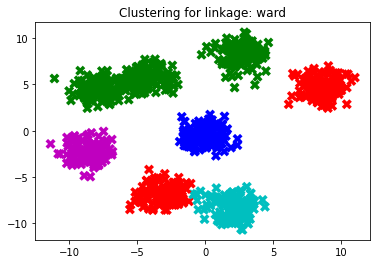

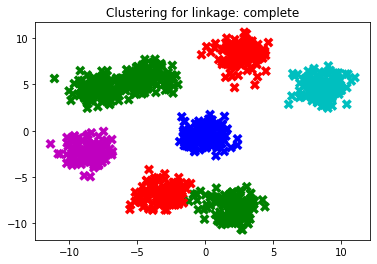

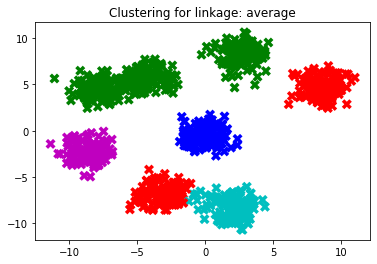

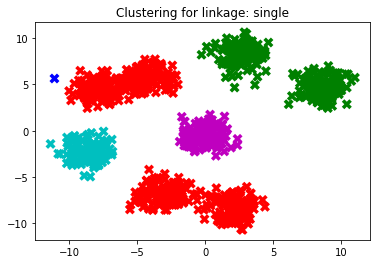

In [17]:
from sklearn.cluster import AgglomerativeClustering

colors = 10*["g","r","c","m","b"]

for v in ['ward', 'complete', 'average', 'single']:
    
    model = AgglomerativeClustering(n_clusters = 7, affinity='euclidean', linkage= v)
    model.fit(X)
    cluster_labels = model.labels_

    cm = [colors[i] for i in cluster_labels.astype(int)]
    
    plt.title(str.format("Clustering for linkage: %s" %v))
   
    plt.scatter( X[:, 0], X[:, 1], marker="X", s=100, lw=0, c=cm)

    plt.show()